In [39]:
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search
from datetime import datetime

client = Elasticsearch(["http://127.0.0.1:9200"])

INDEX = "repo_jitsi_index_def"


In [40]:
# Set arrays for years to be evaluated and months (first array for initial month and second one for final)
# We are evaluating 3 months in each iteration
years = ["2019","2020"]
months = ["01","04","07","10"]
months_2 = ["03","06","09","12"]
x_axis_date = []
y_axis_count = []

for year in years:
    count = 0
    for month in months:
        month_final = months_2[count]
        count += 1
        if month_final in ["03","12"]:
            day = "31"
        elif month_final in ["06","09"]:
            day = "30"
        else:
            #febrero
            day = "28"
        
        if not (month in ["07","10"] and year == "2020"):
            date_evaluated = month+"/"+year+"-\n"+month_final+"/"+year
            s = Search(using=client, index=INDEX).filter('range', commit_date_data={'gte': year+"-"+month+"-01 00:00:00",
                                                                                       'lte': year+"-"+month_final+"-"+day+" 23:59:59"})
            s.aggs.bucket('query','terms', field='author_requested_commit_data').metric('commits','cardinality', field='commit_data')
            result = s.execute()
            json_obj = result.to_dict()["aggregations"]

            total_commits = json_obj['query']['sum_other_doc_count']

            for clave in json_obj['query']['buckets']:
                total_commits += clave['doc_count']

            list_authors = []
            commits_authors = 0
            for clave in json_obj['query']['buckets']:
                list_authors.append(clave['key'])
                commits_authors += clave['doc_count']
                if commits_authors >= (total_commits/2):
                    break
            count_authors = len(list_authors)
            y_axis_count.append(count_authors)
            x_axis_date.append(date_evaluated)

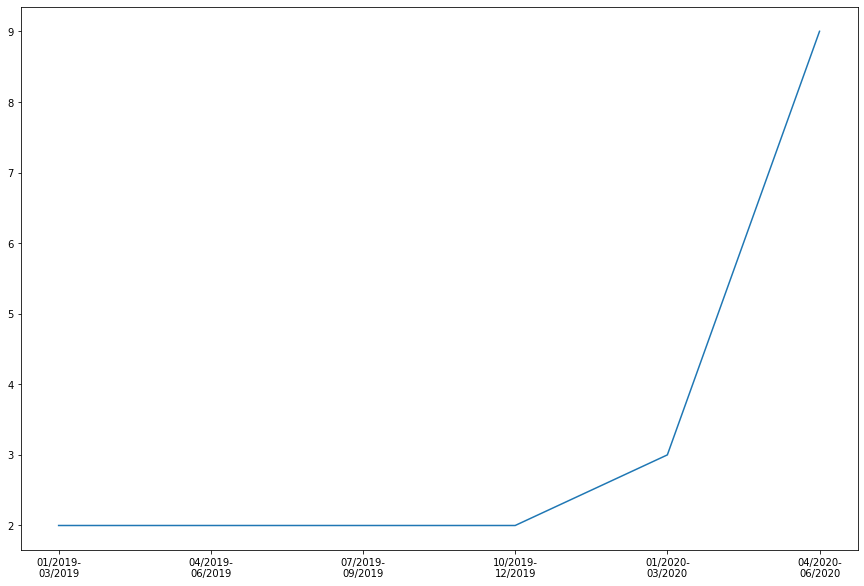

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
plt.plot(x_axis_date,y_axis_count)
plt.show()

In [42]:
# Set arrays for years to be evaluated and months
# We are evaluating 3 months in each iteration
years = ["2019","2020"]
months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
x_axis_date = []
y_axis_count = []

for year in years:
    for month in months:
        
        if month_final in ["01","03","05","07","08","10","12"]:
            day = "31"
        elif month_final in ["04","06","09","11"]:
            day = "30"
        else:
            #febrero
            day = "28"
        
        if not (month in ["06","07","08","09","10","11","12"] and year == "2020"):
            date_evaluated = month+"/"+year
            s = Search(using=client, index=INDEX).filter('range', commit_date_data={'gte': year+"-"+month+"-01 00:00:00",
                                                                                       'lte': year+"-"+month+"-"+day+" 23:59:59"})
            s.aggs.bucket('query','terms', field='author_requested_commit_data').metric('commits','cardinality', field='commit_data')
            result = s.execute()
            json_obj = result.to_dict()["aggregations"]

            total_commits = json_obj['query']['sum_other_doc_count']

            for clave in json_obj['query']['buckets']:
                total_commits += clave['doc_count']

            list_authors = []
            commits_authors = 0
            for clave in json_obj['query']['buckets']:
                list_authors.append(clave['key'])
                commits_authors += clave['doc_count']
                if commits_authors >= (total_commits/2):
                    break

            count_authors = len(list_authors)
            y_axis_count.append(count_authors)
            x_axis_date.append(date_evaluated)

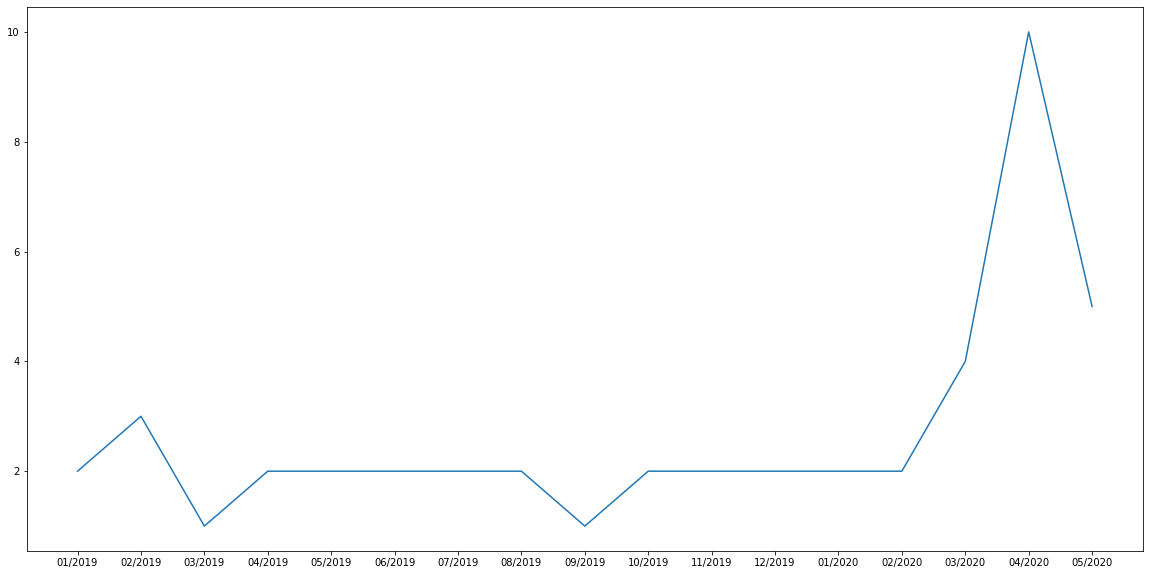

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
plt.plot(x_axis_date,y_axis_count)
plt.show()